### Практическое задание

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

In [20]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [21]:
import warnings

In [22]:
import itertools

In [36]:
from tqdm.notebook import tqdm

#### 1. Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

In [23]:
pjme_data = pd.read_csv('my_PJME_MW.csv', sep = ',', index_col=[0], parse_dates=[0])
pjme_data.head(2)

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0


In [24]:
pjme_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PJME_MW,145374.0,32079.773047,6464.167501,14544.0,27573.0,31421.0,35648.75,62009.0
year,145374.0,2009.801340,4.791885,2002.0,2006.0,2010.0,2014.00,2018.0
month,145374.0,6.435979,3.438982,1.0,3.0,6.0,9.00,12.0
dayofmonth,145374.0,15.722681,8.801258,1.0,8.0,16.0,23.00,31.0
quarter,145374.0,2.481241,1.114448,1.0,1.0,2.0,3.00,4.0
dayofyear,145374.0,180.459835,105.138073,1.0,90.0,179.0,271.00,366.0
weekofyear,145374.0,26.218643,15.019836,1.0,13.0,26.0,39.00,53.0
dayofweek,145374.0,2.999168,1.999572,0.0,1.0,3.0,5.00,6.0
hour,145374.0,11.501101,6.921927,0.0,6.0,12.0,18.00,23.0
is_holiday,145374.0,0.027233,0.162763,0.0,0.0,0.0,0.00,1.0


Text(0.5, 0, 't')

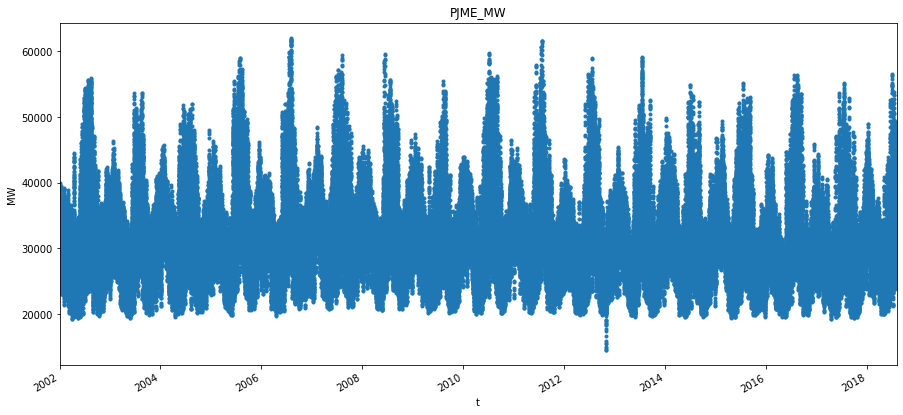

In [25]:
_ = pjme_data['PJME_MW'].plot(style='.', figsize=(15, 7), title='PJME_MW')
plt.ylabel('MW')
plt.xlabel('t')

In [26]:
pjme_data_m = pjme_data.resample('M').mean()
pjme_data_m.head(2)

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714


In [27]:
pjme_data_m.describe().T

,count,mean,std,min,25%,50%,75%,max
PJME_MW,200.0,32108.628796,3534.668371,26314.458333,29193.559812,31879.175067,34574.729839,40603.403226
year,200.0,2009.840000,4.826060,2002.000000,2006.000000,2010.000000,2014.000000,2018.000000
month,200.0,6.420000,3.444258,1.000000,3.000000,6.000000,9.000000,12.000000
dayofmonth,200.0,15.645434,1.084200,1.530612,15.500000,16.000000,16.000000,16.020188
quarter,200.0,2.475000,1.116066,1.000000,1.000000,2.000000,3.000000,4.000000
dayofyear,200.0,179.905434,104.903962,16.000000,76.008748,167.500000,259.500000,351.000000
weekofyear,200.0,26.140008,14.634509,2.741935,11.702145,24.666667,37.800000,51.000000
dayofweek,200.0,2.996992,0.115045,2.530612,2.903226,3.000000,3.095967,3.193548
hour,200.0,11.499990,0.017667,11.265306,11.500000,11.500000,11.500000,11.515478
is_holiday,200.0,0.027135,0.022668,0.000000,0.000000,0.032258,0.033621,0.066759


Text(0.5, 0, 't')

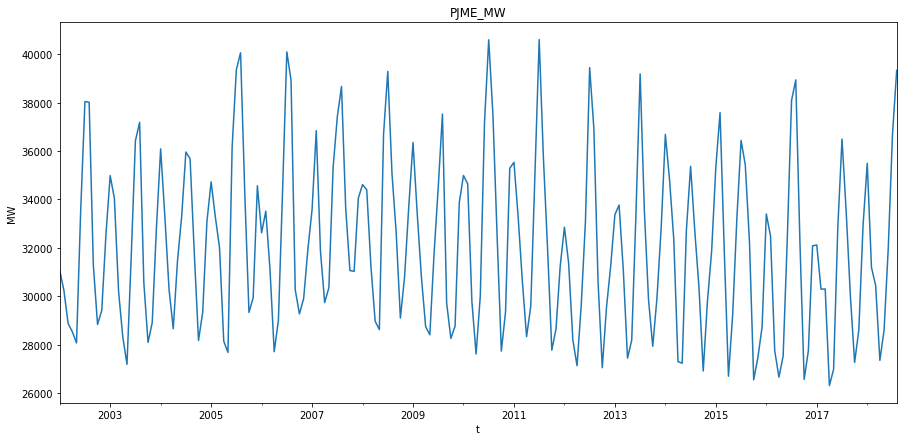

In [28]:
_ = pjme_data_m['PJME_MW'].plot(style='-', figsize=(15, 7), title='PJME_MW')
plt.ylabel('MW')
plt.xlabel('t')

#### 2. Подберите параметры модели SARIMAX для этого ряда.

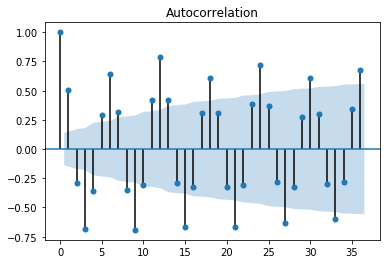

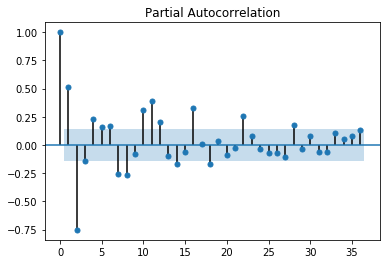

In [30]:
sm.graphics.tsa.plot_acf(pjme_data_m['PJME_MW'].values, lags=36)
plt.show()

sm.graphics.tsa.plot_pacf(pjme_data_m['PJME_MW'].values, lags=36)
plt.show()

In [43]:
p = d = q = range(3)

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [44]:
warnings.filterwarnings("ignore")

results = dict()

for param in tqdm(pdq):
    
    for seasonal_param in seasonal_pdq:
        
        try:
            
            model = sm.tsa.statespace.SARIMAX(
                                        pjme_data_m['PJME_MW'].values[:-36],
                                        order=param,
                                        seasonal_order=seasonal_param,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False
                                    )

            result = model.fit()
            
            # print('ARIMA{}x{}3 - AIC:{}'.format(param, seasonal_param, result.aic))
            
            results[(param, seasonal_param)] = result.aic
            
        except:
            
            continue
            
best_results = sorted(results.items(), key=lambda x: x[1])[0]

print(f'Best params: p, d, q = {best_results[0][0]}, ps, ds, qs, S = {best_results[0][1]}; best AIC: {best_results[1]}')



Best params: p, d, q = (0, 1, 2), ps, ds, qs, S = (0, 2, 2, 12); best AIC: 2008.9583991497952


In [45]:
model = sm.tsa.statespace.SARIMAX(
                                pjme_data_m['PJME_MW'].values[:-36],
                                order=best_results[0][0],
                                seasonal_order=best_results[0][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False
                            )

result = model.fit()

In [46]:
print(result.summary().tables[0], result.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  164
Model:             SARIMAX(0, 1, 2)x(0, 2, 2, 12)   Log Likelihood                -999.479
Date:                            Tue, 14 Apr 2020   AIC                           2008.958
Time:                                    21:33:32   BIC                           2022.551
Sample:                                         0   HQIC                          2014.473
                                            - 164                                         
Covariance Type:                              opg                                         
========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

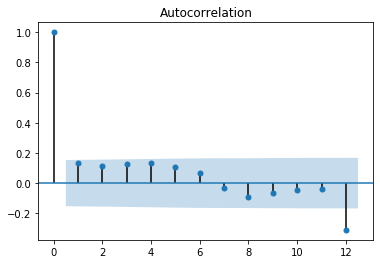

In [47]:
sm.graphics.tsa.plot_acf(result.resid, lags=12)
plt.show()

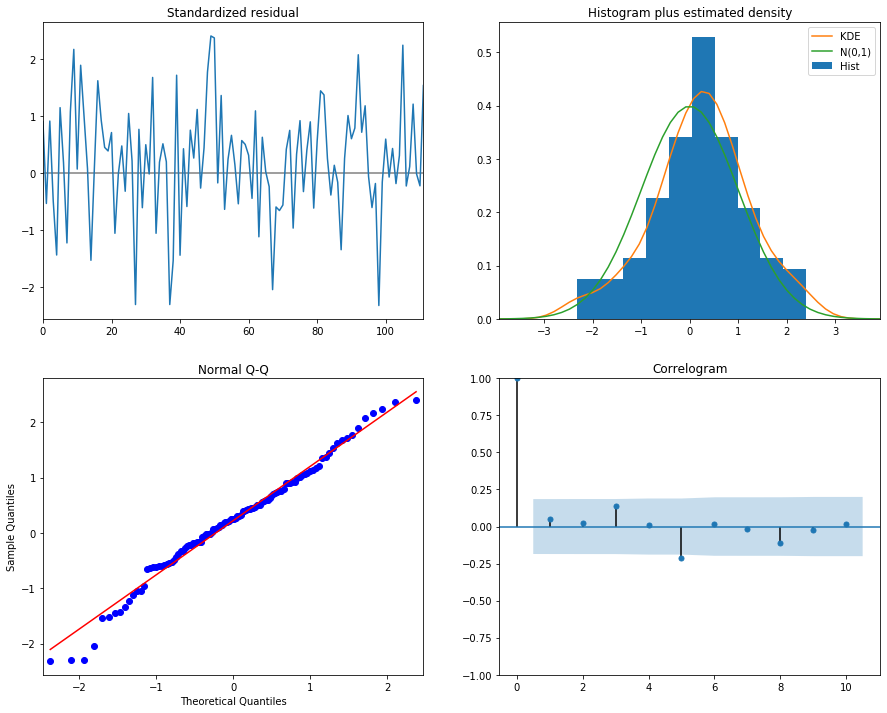

In [48]:
result.plot_diagnostics(figsize=(15, 12))
plt.show()

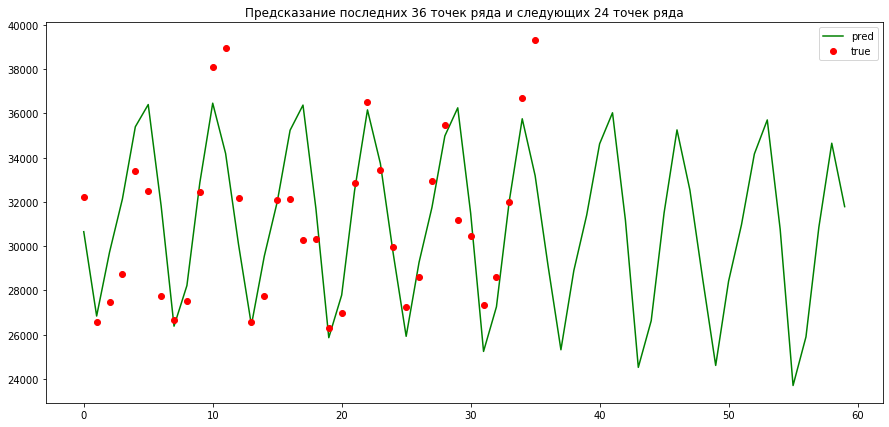

In [50]:
plt.figure(figsize=(15, 7))

pjme_data_m_pred = result.forecast(60)

plt.plot(pjme_data_m_pred, 'g', label='pred')
plt.plot(pjme_data_m['PJME_MW'].values[-36:], 'or', label='true')

plt.title('Предсказание последних 36 точек ряда и следующих 24 точек ряда')
plt.legend()

plt.show()

#### 3. Сделайте вывод о том, как изменилась модель по сравнению с недельной

- Остатки модели не распределы идеально, но достаточно близки к нормальному распределению N (0, 1). <br>
- Упорядоченное распределение остатков следует линейному тренду выборок (за небольшим исключением в первом квартиле), взятых из стандартного распределения N (0, 1). <br>
- Остатки с течением времени (за исключением самого начала измерений) не показывают явной сезонности и кажутся белыми шумами. <br>
- Отсутствие сезонности в остатках подтверждается графиком автокорреляции, который показывает, что остатки временных рядов имеют низкую корреляцию с запаздывающими данными. <br>

#### 4. Возмите вариант 1 или 2
- Вариант 1) - Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)
- Вариант 2) - Постройте ACF, PACF и модель ARIMA для СOVID_19 (по любой стране кроме Китая на дневных графиках )

In [51]:
brent_data = pd.read_csv('my_BRENT2019.csv', sep = ',', index_col=[0], parse_dates=[0])
brent_data.head(2)

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0


In [52]:
brent_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Значение,2667.0,81.533547,26.349469,27.85,56.84,77.71,108.19,126.9
year,2667.0,2014.661042,2.663525,2010.00,2012.00,2015.00,2017.00,2019.0
month,2667.0,6.517060,3.430260,1.00,4.00,7.00,9.00,12.0
dayofmonth,2667.0,15.715786,8.780275,1.00,8.00,16.00,23.00,31.0
quarter,2667.0,2.505062,1.112684,1.00,2.00,3.00,3.00,4.0
dayofyear,2667.0,182.901762,104.741067,2.00,92.00,183.00,273.00,366.0
weekofyear,2667.0,26.486689,14.935147,1.00,14.00,27.00,39.00,53.0
dayofweek,2667.0,2.537308,1.894937,0.00,1.00,2.00,4.00,6.0
is_holiday,2667.0,0.027747,0.164277,0.00,0.00,0.00,0.00,1.0
is_prev_holiday,2667.0,0.026997,0.162104,0.00,0.00,0.00,0.00,1.0


Text(0.5, 0, 't')

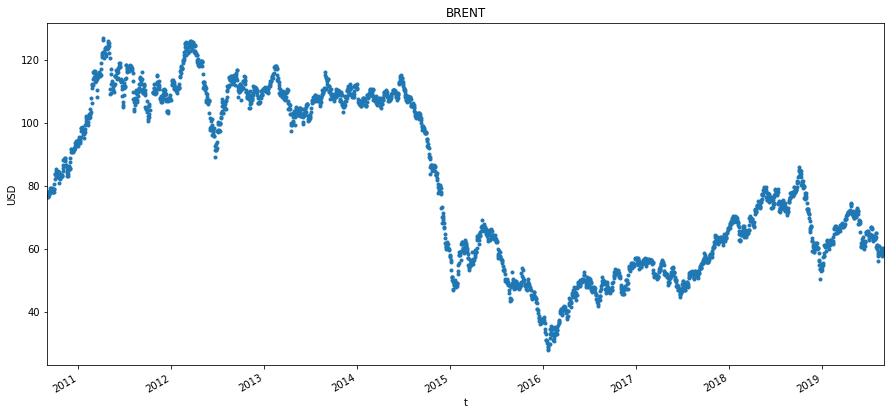

In [53]:
_ = brent_data['Значение'].plot(style='.', figsize=(15, 7), title='BRENT')
plt.ylabel('USD')
plt.xlabel('t')

In [54]:
brent_data_w = brent_data.resample('M').mean()
brent_data_w.head(2)

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-30,78.228148,2010.0,9.0,15.185185,3.0,258.185185,36.925926,2.703704,0.037037,0.037037,0.037037
2010-10-31,83.473462,2010.0,10.0,16.000000,4.0,289.000000,41.307692,2.846154,0.038462,0.038462,0.038462


In [55]:
brent_data_w.describe().T

,count,mean,std,min,25%,50%,75%,max
Значение,109.0,80.571077,26.667645,31.984737,57.264074,75.704800,108.559167,124.502308
year,109.0,2014.706422,2.657285,2010.000000,2012.000000,2015.000000,2017.000000,2019.000000
month,109.0,6.522936,3.460348,1.000000,4.000000,7.000000,9.000000,12.000000
dayofmonth,109.0,15.580231,1.514704,1.000000,15.346154,15.761905,16.074074,17.280000
quarter,109.0,2.504587,1.119059,1.000000,2.000000,3.000000,3.000000,4.000000
dayofyear,109.0,182.965552,105.204359,15.625000,105.192308,196.777778,260.045455,350.840000
weekofyear,109.0,26.498416,14.780596,2.421053,15.304348,28.307692,37.909091,50.954545
dayofweek,109.0,2.552969,0.434195,1.863636,2.481481,2.629630,2.703704,6.000000
is_holiday,109.0,0.027625,0.026652,0.000000,0.000000,0.037037,0.041667,0.095238
is_prev_holiday,109.0,0.035238,0.097607,0.000000,0.000000,0.037037,0.040000,1.000000


Text(0.5, 0, 't')

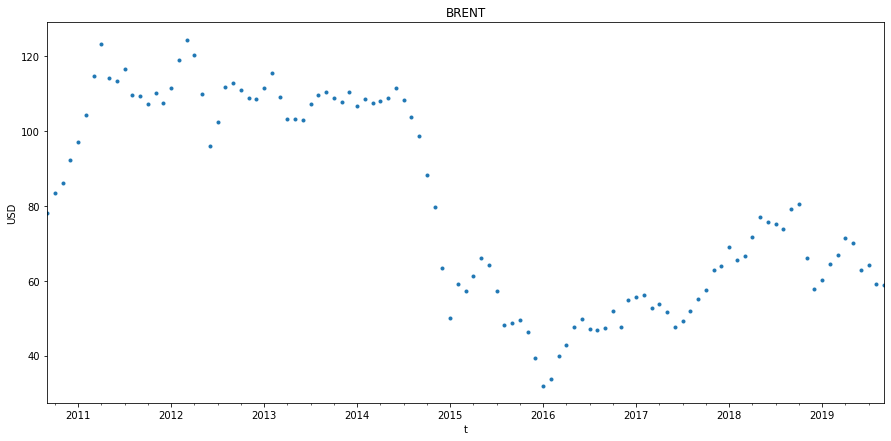

In [56]:
_ = brent_data_w['Значение'].plot(style='.', figsize=(15, 7), title='BRENT')
plt.ylabel('USD')
plt.xlabel('t')

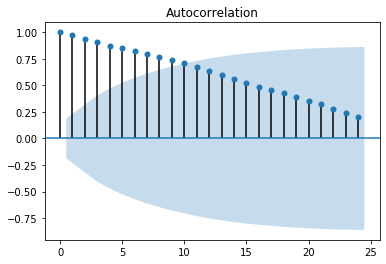

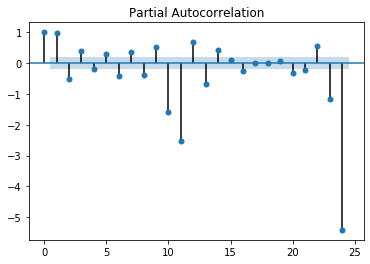

In [61]:
sm.graphics.tsa.plot_acf(brent_data_w['Значение'].values, lags=24)
plt.show()

sm.graphics.tsa.plot_pacf(brent_data_w['Значение'].values, lags=24)
plt.show()

In [62]:
p = d = q = range(4)

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(0, 0, 0, 0)]

In [79]:
warnings.filterwarnings("ignore")

results = dict()

for param in tqdm(pdq):
    
    for seasonal_param in seasonal_pdq:
        
        try:
            
            model = sm.tsa.statespace.SARIMAX(
                                        brent_data_w['Значение'].values[:-52],
                                        order=param,
                                        seasonal_order=seasonal_param,
                                        trend='t',
                                        enforce_stationarity=False,
                                        enforce_invertibility=False
                                    )

            result = model.fit()
            
            # print('ARIMA{}x{}3 - AIC:{}'.format(param, seasonal_param, result.aic))
            
            results[(param, seasonal_param)] = result.aic
            
        except:
            
            continue
            
best_results = sorted(results.items(), key=lambda x: x[1])[0]

print(f'Best params: p, d, q = {best_results[0][0]}, ps, ds, qs, S = {best_results[0][1]}; best AIC: {best_results[1]}')



Best params: p, d, q = (1, 1, 3), ps, ds, qs, S = (0, 0, 0, 0); best AIC: 331.8042801618329


In [80]:
model = sm.tsa.statespace.SARIMAX(
                                brent_data_w['Значение'].values[:-52],
                                order=best_results[0][0],
                                seasonal_order=best_results[0][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False
                            )

result = model.fit()

In [81]:
print(result.summary().tables[0], result.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   57
Model:               SARIMAX(1, 1, 3)   Log Likelihood                -162.337
Date:                Tue, 14 Apr 2020   AIC                            334.674
Time:                        21:39:26   BIC                            344.430
Sample:                             0   HQIC                           338.414
                                 - 57                                         
Covariance Type:                  opg                                         
============================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6987      0.265      2.635      0.0

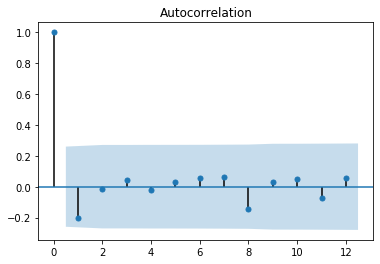

In [82]:
sm.graphics.tsa.plot_acf(result.resid, lags=12)
plt.show()

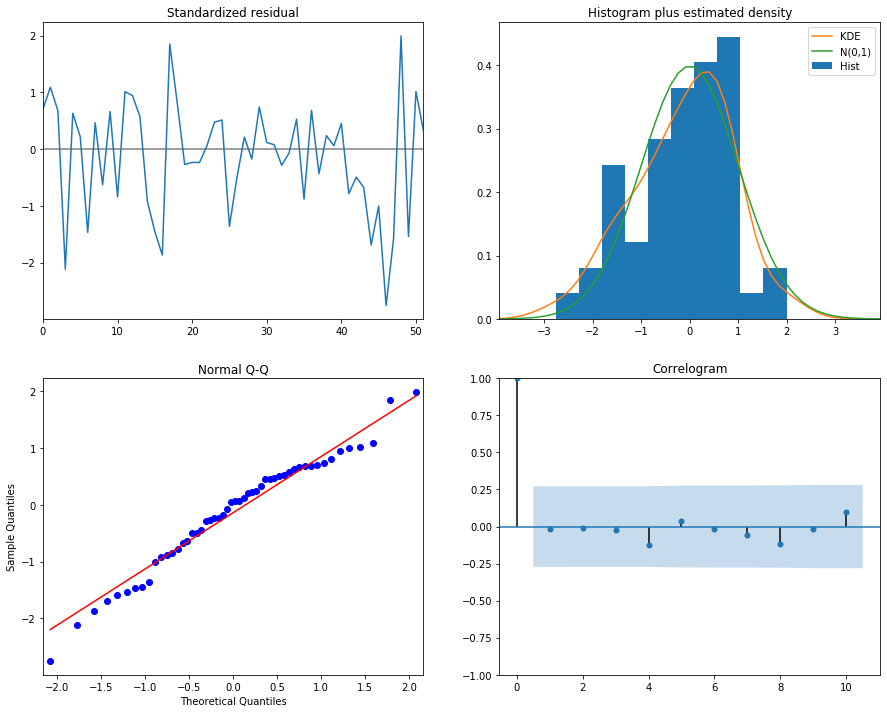

In [83]:
result.plot_diagnostics(figsize=(15, 12))
plt.show()

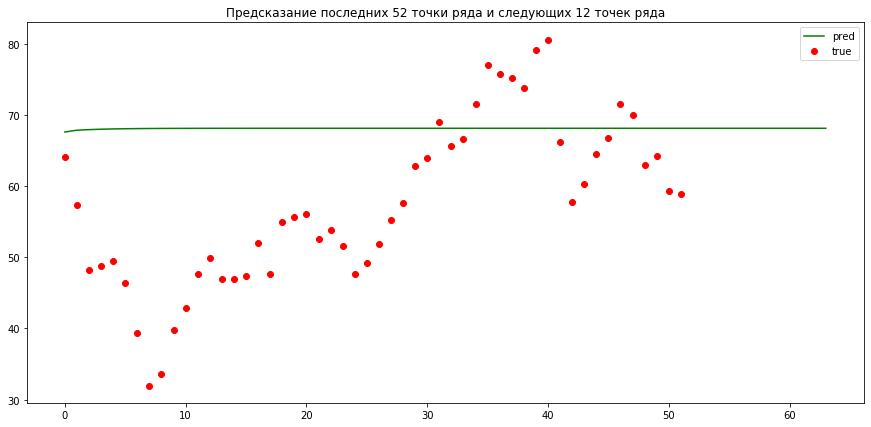

In [84]:
plt.figure(figsize=(15, 7))

brent_data_w_pred = result.forecast(64)

plt.plot(brent_data_w_pred, 'g', label='pred')
plt.plot(brent_data_w['Значение'].values[-52:], 'or', label='true')

plt.title('Предсказание последних 52 точки ряда и следующих 12 точек ряда')
plt.legend()

plt.show()

#### 5. Оцените результат моделирования

In [85]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [91]:
y_true = brent_data_w['Значение'].values[-52:]
y_pred = brent_data_w_pred[-52:]

err = mean_absolute_percentage_error(y_true, y_pred)

print(f'Mean absolute percentage error: {np.round(err, 4)}%')

Mean absolute percentage error: 26.8512%


Недельные данные по котировкам нефти марки Brent достаточно волатильны и не имеют сезонности. Достаточно тяжело строить точный прогноз, а получившийся результат напоминает среднее значение с небольшим положительным трендом. Ошибка прогноза составляет 26.85%.

#### 6. Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе AR I MA

Модель ARIMA лучше подойдет для прогнозирования стационарных рядов данных (или нестанционарных рядов, которые можно привести к стационарным), для данных с трендом / сезонностью, не имеющих сильных выбросов и аномалий, шума в данных. Также для моделирования должны быть накоплена статистика, в том числе и по сезонам (если в данных присутствует сезонность).